<div style="border:solid black 2px; padding: 20px">

# Reviewer's Introduction

Halo Mufti!

Saya Yosef, pada kesempatan kali ini saya akan memeriksa proyek kamu.

Kamu bisa melihat komentar saya di bagian bawah kode - tolong **jangan dipindah, diubah, atau dihapus** ya supaya saya bisa cek kembali ketika sudah kamu perbaiki.
    
Komentar dari saya bisa dalam kotak berwarna hijau, kuning, atau merah sebagai berikut

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Ada catatan.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perlu perbaikan.
</div>

Mufti bisa merespon komentar saya dengan kotak berwarna biru, seperti ini

<div class="alert alert-block alert-info">
<b>Student's comment</b> <a class="tocSkip"></a>
    
Baik kak. <a class="tocSkip"></a>
</div>
    
Mohon diingat beberapa hal penting terkait proyek ini:
- proyek belum bisa diterima jika masih ada komentar dengan kotak berwarna merah
- tenang saja, kamu punya 3 kali kesempatan memperbaiki
- tapi ingat, pada setiap kesempatan kamu punya waktu maksimal 1 x 24 jam untuk memperbaiki proyek ya
    
</div>


<div style="border:solid black 1px; padding: 20px" class="alert alert-block alert-success">
    
# Reviewer's general feedback v1

Terima kasih sudah mengirimkan proyek ini!
    
Secara umum proyek kamu sudah **sangat baik** dan proyek sudah bisa diterima. Kamu sudah mengerjakan proyek dengan terstruktur dan eksplorasi model juga sudah bagus. Analisis dan kesimpulan juga cukup lengkap. Semoga kamu terus semangat dalam perjalanan belajarmu, dan makin banyak yang bisa kamu pelajari pada proyek-proyek berikutnya ya.
    
*Good luck*!
    
</div>

# Konten <a id='back'></a>

* [Pendahuluan](#Pendahuluan)
* [Langkah 1 : Explore Data Analysis](#langkah1)
* [Langkah 2 : Persiapan Fitur dan Split Data ](#langkah2)
* [Langkah 3 : Mengecek Model dengan Kelas Imbalance dan Balance Dengan Beberapa Metode](#langkah3)
* [Langkah 4 : Periksa Kualitas Model pada test dataset](#langkah4)
* [Langkah 5 : Membuat Kurva dan Mencari Nilai AUC-ROC](#langkah5)
* [Kesimpulan](#kesimpulan)
</a>

# Pendahuluan <a id='Pendahuluan'></a>

Nasabah Bank Beta pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa lebih murah untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru.

Pada kasus ini, tugas kita adalah untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. Anda memiliki data terkait perilaku para klien di masa lalu dan riwayat pemutusan kontrak mereka dengan bank.

Buatlah sebuah model dengan skor F1 semaksimal mungkin. Untuk bisa dinyatakan lulus dari peninjauan, Anda memerlukan skor F1 minimal 0,59 untuk test dataset. Periksa nilai F1 untuk test set.

Selain itu, ukur metrik AUC-ROC dan bandingkan metrik tersebut dengan skor F1.

Fitur-fitur

* RowNumber — indeks string data
* CustomerId — ID pelanggan
* Surname — nama belakang
* CreditScore — skor kredit
* Geography — negara domisili
* Gender — gender
* Age — umur
* Tenure — jangka waktu jatuh tempo untuk deposito tetap nasabah (tahun)
* Balance — saldo rekening
* NumOfProducts — jumlah produk bank yang digunakan oleh nasabah
* HasCrCard — apakah nasabah memiliki kartu kredit
* IsActiveMember — tingkat keaktifan nasabah
* EstimatedSalary — estimasi gaji

Target

* Exited — apakah nasabah telah berhenti

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Pendahuluan sudah sangat bagus.
</div>

# Langkah 1 : Explore Data  Analysis <a id='langkah1'></a>

# Membaca Data dan Informasi Umum <a id='info'></a>

In [1]:
#import modul data preprocessing dan manipulation
import pandas as pd
import re
import numpy as np

#import modul visualisasi
import matplotlib.pyplot as plt

#import modul split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import modul classiffier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#import modul metrik evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

#import utility
from sklearn.utils import shuffle

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Pemuatan library sudah bagus.
</div>

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Pemuatan dataset sudah bagus.
</div>

In [3]:
#Informasi Umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#Cek nilai duplikat
df.duplicated().sum()

0

In [5]:
#Cek nilai null
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
#tabel deskriptif
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#Ukuran tabel
df.shape

(10000, 14)

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Dari langkah diatas dan pembacaan data yang diambil dari file '/datasets/Churn.csv', diketahui file tersebut berjumlah 14 kolom dan 10,000 baris. 
Tidak ada nilai duplikat namun ada nilai null pada kolom  tenur sekitar 9 peresen. Langkah selanjutnya adalah mengisi nilai kosong dan memperbaiki tipe data.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Pemeriksaan data awal sudah bagus.
</div>

# Mengisi Nilai Kosong dan Memperbaiki Tipe Data <a id='data_preprocessing'></a>

In [8]:
#Mengganti nama kolom dengan lower case
columns = []
for name in df.columns.values:
    name = re.sub('([A-Z])', r' \1', name).lower().replace(' ', '_')[1:]
    columns.append(name)

In [9]:
df.columns = columns

In [10]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Perbaikan nama kolom sudah bagus.
</div>

In [11]:
#df.head(5)

In [12]:
df['num_of_products'].sort_values().unique()

array([1, 2, 3, 4])

In [13]:
#Fungsi mengisi nilai hilang dengan mean
def mean_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].mean().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [14]:
#Mengisi nilai kosong di kolom tenur berdasarkan rata rata kelompok num_of_products
df = mean_missing_value(df, 'num_of_products', 'tenure')

In [15]:
#Memerpbaiki Tipe Data
df['tenure'] = df['tenure'].astype(int)

In [16]:
df['tenure'].sort_values().value_counts()

4     1384
5     1337
1      952
2      950
8      933
3      928
7      925
9      882
6      881
10     446
0      382
Name: tenure, dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Perbaikan nilai hilang pada `tenure` sudah bagus.
</div>

In [17]:
df.head(5)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Nama kolom telah diperbaiki menjadi huruf kecil semua, nilai kosong di kolom tenure telah diisi oleh rata rata tenur berdasrkan kelompok num_of_products. Diisi dengan rata rata karena nilai median dan mean tenur tidak jauh berbeda. Tipe data tenure juga di perbaiki agar memudahkan analisa.
</div>

# Langkah 2 : Persiapan Fitur dan Split Data <a id='langkah2'></a>

# Persiapan Fitur<a id='persiapan_fitur'></a>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
#Mendrop kolom row_number karena redundant dengan index, customer_id dan surname karena tidak dibutukan untuk modelling
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
#one-hot encoding untuk fitur kategorikal fitur dengan mencegah dummy trap
df_ohe = pd.get_dummies(df, drop_first=True) 

In [21]:
df_ohe.head(5)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Oke, dummy variable sudah bagus.
</div>

In [22]:
#membuat variabel fitur dan target
target = df_ohe['exited']
features = df_ohe.drop('exited', axis=1)

In [23]:
target.head(5)

0    1
1    0
2    1
3    0
4    0
Name: exited, dtype: int64

In [24]:
features.head(5)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Untuk beberapa kolom telah di drop karena tidak mempengaruh pemodelan data. Telah dilakukan juga encoding untuk kategori data menggunakan OHE.
Dengan proses OHE muncul kolom. Agar terhindar dari dummy trap, kita drop lagi kolom pertama dari proses OHE. Telah ditentukan juga target yang akan di prediksi yaitu kolom exited.
Juga Fitur atau observasi kecuali kolom exited.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Sip.
</div>

# Split data source menjadi training set, validation set, dan test set<a id='split_data'></a>

In [25]:
#Split data (fitur& target) source menjadi training dan testing dengan perbandingan 80 : 20
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

In [26]:
#Split data (fitur& target) train menjadi training dan validation dengan perbandingan 80 : 20
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Komentar kode sedikit keliru, seharusnya perbandingan 0.25 seperti yang kamu buat di kode.
</div>

In [27]:
#Mengecek ukuran apakah benar sudah 80:20:20 atau 3:1:1
features_train.shape, features_test.shape, features_valid.shape

((6000, 11), (2000, 11), (2000, 11))

In [28]:
features_train.shape[0] * 100 / features.shape[0], features_test.shape[0] * 100 / features.shape[0], features_valid.shape[0] * 100 / features.shape[0]

(60.0, 20.0, 20.0)

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Dilakukan split data yaitu train, valid dan test dengan proporsional 60:20:20. Train untuk data yang akan kita latih, valid untuk data yang sudah terlatih, test data set untuk mengecek lagi model kita.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Sip.
</div>

# Penskalaan Fitur<a id='skala_fitur'></a>

In [29]:
features.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [30]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
            'has_cr_card', 'is_active_member', 'estimated_salary']

In [31]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [32]:
pd.options.mode.chained_assignment = None

In [33]:
features_train[numeric] = scaler.transform(features_train[numeric])

In [34]:
features_test[numeric] = scaler.transform(features_test[numeric])

In [35]:
features_valid[numeric] = scaler.transform(features_valid[numeric])

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Karena fitur mempunyai skala/range yang berbeda, perlu dilakukan standarisasi untuk fitur dengan data numerik. Langkah selanjutnya adalah menganalisa data dengan kelas imbalance maupun balance dengan beberapa methode.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Scaling sudah benar, `fit` hanya menggunakan data train.
</div>

# Langkah 3 : Mengecek Model dengan Kelas Imbalance dan Balance dengan beberapa metode <a id='langkah3'></a>

# Model dengan Kelas Imbalance<a id='model_imbalance'></a>

0    0.9305
1    0.0695
dtype: float64
f1_score decisiontree classifier = 0.430188679245283


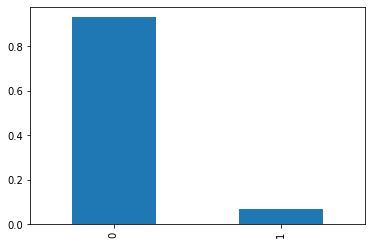

In [36]:
#DecisionTree Classifier
model = DecisionTreeClassifier(random_state=12345, max_depth=4)
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
predicted_train = model.predict(features_train)
accuracy_valid = accuracy_score(target_valid, predicted_valid)
accuracy_train = accuracy_score(target_train, predicted_train)
#print('accuracy_valid', accuracy_valid)
#print('accucary_train', accuracy_train)
#print(predicted_valid)

#Sanity Check
valid_predictions = pd.Series(model.predict(features_valid))
class_frequency = valid_predictions.value_counts(normalize=True)
print(class_frequency)
print('f1_score decisiontree classifier =', f1_score(target_valid, valid_predictions))
class_frequency.plot(kind='bar')
plt.show()

0    0.93
1    0.07
dtype: float64
f1_score logistic regression = 0.30131826741996237


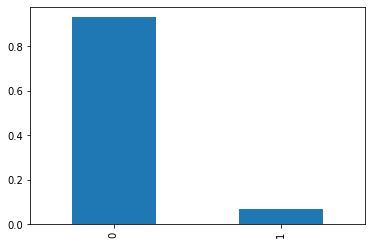

In [37]:
#Logistic Regression
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

#Sanity Check
valid_predictions = pd.Series(model.predict(features_valid))
class_frequency = valid_predictions.value_counts(normalize=True)
print(class_frequency)
print('f1_score logistic regression =', f1_score(target_valid, valid_predictions))
class_frequency.plot(kind='bar');

f1_score randomforest classifier = 0.5562700964630225
0    0.8845
1    0.1155
dtype: float64


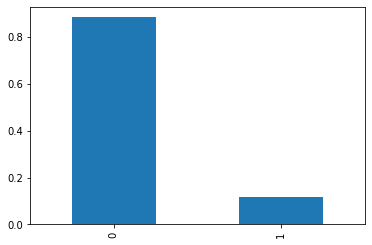

In [38]:
#RandomForest Classifier  
model = RandomForestClassifier(random_state = 12345)
model.fit(features_train, target_train)

#sanity check
valid_predictions = pd.Series(model.predict(features_valid))
class_frequency = valid_predictions.value_counts(normalize=True)
print('f1_score randomforest classifier =', f1_score(target_valid, valid_predictions))
print(class_frequency)
class_frequency.plot(kind='bar');

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*Berikut informasi yang didapat dari analisa model dengan kelas imbalance dengan beberapa metode :
     
- DecisionTree Classifier memiliki target 0 sekitar 0.93, dan f1_score sekitar 0.4
- Logistic Regression memiliki target 0 sekitar 0.93, dan f1_score sekitar 0.3
- RandomForest  Classifier memiliki target 0 sekitar 0.88, dan f1_score sekitar 0.55
     
Bisa dilihat model dengan beberapa metode diatas memiliki kelas yang imbalance. Juga untuk semua f1_score dibawah 0.59 (nilai minimal untuk projek ini), sehingga model tersebut perlu diperbaiki dan ditingkatkan. Langkah selanjutnya adalah membalance kan kelas kita dengan bebrapa methode yaitu (Class Weight Adjustment, Upsampling, dan Downsampling).
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Oke, pemodelan dengan kelas imbalance sudah bagus. Akan lebih baik untuk data imbalance juga dilakukan optimasi ya, tetapi menggunakan default hyperparameter masih diterima.
</div>

# Model dengan Kelas Balance<a id='model_balance'></a>

# Method 1 : Class Weight Adjustment <a id='class_weight'></a>

In [39]:
#Class Weight Adjustment (DecisionTreeClassifier)
acc_valid_scores = []
f1_vaild_scores = []

d = []

for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    #Membuat accuracy_score di dataset valid
    prediction_valid = model.predict(features_valid)
    valid_predictions = pd.Series(model.predict(features_valid))
    acc_valid = accuracy_score(target_valid, prediction_valid)
    f1_valid = f1_score(target_valid, prediction_valid)
    acc_valid_scores.append(acc_valid)
    #untuk dataframe
    d.append(
        {
            'max_depth': depth,
            'f1_valid':  f1_valid
        }
     )
    #print('max_depth =', depth, ': ')
    #print('valid_set_acc= {:.3f}'.format(acc_valid))
    #print('f1_score decisiontree classifier =', f1_score(target_valid, valid_predictions))
    #print('f1_score= {:.3f}'.format(f1_score))
    #print()
            
best_param = pd.DataFrame(d).nlargest(1, ['f1_valid'], keep='first')
f1_valid = best_param['f1_valid'].values
best_param

,max_depth,f1_valid
5,6,0.558704


In [40]:
#Class Weight Adjustment (RandomForestClassifier)

d=[]

for est in range(1, 30):
    model = RandomForestClassifier(random_state = 12345, n_estimators=est, class_weight='balanced')
    model.fit(features_train, target_train)
    prediction_valid = model.predict(features_valid)
    acc_valid = accuracy_score(target_valid, prediction_valid)
    f1_valid = f1_score(target_valid, prediction_valid)
    d.append(
        {
            'estimator': est,
            'f1_valid':  f1_valid
        }
     )

best_param = pd.DataFrame(d).nlargest(1, ['f1_valid'], keep='first')
f1_valid = best_param['f1_valid'].values
best_param

,estimator,f1_valid
28,29,0.546042


In [41]:
#Class Weight Adjustment (LogisticRegression)

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
prediction_valid = model.predict(features_valid)
acc_valid = accuracy_score(target_valid, prediction_valid)
f1_valid = f1_score(target_valid, prediction_valid)
print('f1_valid : ', f1_valid)

f1_valid :  0.4746666666666667


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*Berikut informasi yang didapat dari analisa model dengan kelas balance dengan metode class weight adjustment :
     
- DecisionTree Classifier memiliki f1_score 0.55 dedngan max_depth 5.
- RandomForest  Classifier memiliki f1_score sekitar 0.54 dengan estimator 29.
- Logistic Regression memiliki target f1_score 0.47.
     
Dengan metode Class Weight Adjusment masih belum memenuhi f1_score 0.59.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Sip.
</div>

# Method 2 : Upsampling <a id='upsampling'></a>

In [42]:
#Fungsi Upsampling

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

In [43]:
#upsampling (DecisionTreeClassifier)

d = []

for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    prediction_valid = model.predict(features_valid)
    acc_valid = accuracy_score(target_valid, prediction_valid)
    f1_valid = f1_score(target_valid, prediction_valid)
    d.append(
        {
            'max_depth': depth,
            'f1_valid':  f1_valid
        }
     )
            
best_param = pd.DataFrame(d).nlargest(1, ['f1_valid'], keep='first')
f1_valid = best_param['f1_valid'].values
best_param

,max_depth,f1_valid
4,5,0.486919


In [44]:
#upsampling (RandomForestClassifier)

d=[]

for est in range(1, 30):
    model = RandomForestClassifier(random_state = 12345, n_estimators=est)
    model.fit(features_upsampled, target_upsampled)
    prediction_valid = model.predict(features_valid)
    acc_valid = accuracy_score(target_valid, prediction_valid)
    f1_valid = f1_score(target_valid, prediction_valid)
    d.append(
        {
            'estimator': est,
            'f1_valid':  f1_valid
        }
     )

best_param = pd.DataFrame(d).nlargest(1, ['f1_valid'], keep='first')
f1_valid = best_param['f1_valid'].values
best_param

,estimator,f1_valid
28,29,0.592593


In [45]:
#Class Weight Adjustment (LogisticRegression)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
prediction_valid = model.predict(features_valid)
acc_valid = accuracy_score(target_valid, prediction_valid)
f1_valid = f1_score(target_valid, prediction_valid)
print('f1_valid : ', f1_valid)

f1_valid :  0.4043956043956044


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*Berikut informasi yang didapat dari analisa model dengan kelas balance dengan metode Upsampling :
     
- DecisionTree Classifier memiliki f1_score 0.48 dedngan max_depth 5.
- RandomForest  Classifier memiliki f1_score sekitar 0.59 dengan estimator 29.
- Logistic Regression memiliki target f1_score 0.40.
     
Dengan metode Upsampling dan  model RadomForest Classsifier kita telah memenuhi nilai minal f1_score projek ini yaitu 0.59.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Oke, untuk upsampling dan optimasi sederhana sudah bagus.
</div>

# Method 3 : Downsampling <a id='downsampling'></a>

In [46]:
#Fungsi Downsampling

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

In [47]:
#Downsampling (DecisionTreeClassifier)

d = []

for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    prediction_valid = model.predict(features_valid)
    acc_valid = accuracy_score(target_valid, prediction_valid)
    f1_valid = f1_score(target_valid, prediction_valid)
    d.append(
        {
            'max_depth': depth,
            'f1_valid':  f1_valid
        }
     )
            
best_param = pd.DataFrame(d).nlargest(1, ['f1_valid'], keep='first')
f1_valid = best_param['f1_valid'].values
best_param

,max_depth,f1_valid
4,5,0.515663


In [48]:
#Downsampling (RandomForestClassifier)

d=[]

for est in range(1, 30):
    model = RandomForestClassifier(random_state = 12345, n_estimators=est)
    model.fit(features_downsampled, target_downsampled)
    prediction_valid = model.predict(features_valid)
    acc_valid = accuracy_score(target_valid, prediction_valid)
    f1_valid = f1_score(target_valid, prediction_valid)
    d.append(
        {
            'estimator': est,
            'f1_valid':  f1_valid
        }
     )

best_param = pd.DataFrame(d).nlargest(1, ['f1_valid'], keep='first')
f1_valid = best_param['f1_valid'].values
best_param

,estimator,f1_valid
21,22,0.482094


In [49]:
#Downsampling (LogisticRegression)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
prediction_valid = model.predict(features_valid)
acc_valid = accuracy_score(target_valid, prediction_valid)
f1_valid = f1_score(target_valid, prediction_valid)
print('f1_valid : ', f1_valid)

f1_valid :  0.4053452115812918


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*Berikut informasi yang didapat dari analisa model dengan kelas balance dengan metode Downsampling :
     
- DecisionTree Classifier memiliki f1_score 0.51 dedngan max_depth 5.
- RandomForest  Classifier memiliki f1_score sekitar 0.48 dengan estimator 22.
- Logistic Regression memiliki target f1_score 0.40.
     
Dengan metode Downsampling tidak ada yang memenuhi nilai f1_score 0.59. Sehingga metode terbaik adalah Upsampling dengan model RandomForest Classifier. Langkah selanjutnya adalah menguji metode dan kualitas model tersebut ke test dataset.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Sip, untuk downsampling sudah bagus.
</div>

# Langkah 4 : Periksa Kualitas Model pada test dataset <a id='langkah4'></a>

# Periksa kualitas model dengan menggunakan test set dengan metode terbaik (Upsampling) dan model terbarik (RandomForest Classifier)<a id='test_set'></a>

In [50]:
model = RandomForestClassifier(random_state = 12345, n_estimators=29)
model.fit(features_upsampled, target_upsampled)
#train dataset
prediction_train = model.predict(features_train)
f1_train = f1_score(target_train, prediction_train)
#valid dataset
prediction_valid = model.predict(features_valid)
f1_valid = f1_score(target_valid, prediction_valid)
#test dataset
prediction_test = model.predict(features_test)
f1_test = f1_score(target_test, prediction_test)
#print
print('f1_train : ',f1_train)
print('f1_valid : ',f1_valid)
print('f1_test  : ',f1_test)

f1_train :  0.9991803278688524
f1_valid :  0.5925925925925927
f1_test  :  0.5902061855670102


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Sip, bagus sekali.
</div>

In [51]:
features_train.shape, features_test.shape, features_valid.shape

((6000, 11), (2000, 11), (2000, 11))

0    0.8255
1    0.1745
dtype: float64
f1_score RandomForestClassifier = 0.5902061855670102


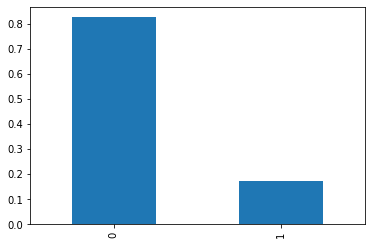

In [52]:
#Sanity Check
test_predictions = pd.Series(model.predict(features_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
print('f1_score RandomForestClassifier =', f1_score(target_test, test_predictions))
class_frequency.plot(kind='bar')
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*Berikut informasi yang didapat dari pengujian kualitas model pada test dataset :
     
- f1_score test dataset yang didapat adalah 0.59, tidak jauh beda dengan valid dataset. Namun jauh berbeda dengan train dataset yang 0.9. 
- Dengan metode upsampling untuk kelas 1 terjadi peningkatan menjadi sekitar 0.17.

Langkah selanjutnya adalah membuat kurva dan mencari nilai AUC-ROC di dataset test
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Oke.
</div>

# Langkah 5 : Membuat Kurva dan Mencari Nilai AUC-ROC <a id='langkah5'></a>

# Kurva AUC-ROC<a id='test_set'></a>

In [53]:
#probabilitas valid set
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print(probabilities_one_valid[:5])

[0.24137931 0.86206897 0.         0.72413793 0.89655172]


In [54]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8293558134470586


<Figure size 432x288 with 0 Axes>

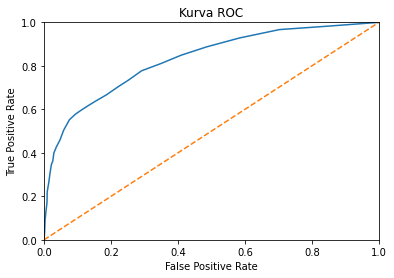

In [55]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)# < ketik kode program Anda di sini >

plt.figure()

#plt.plot([0, 1], [0, 1], linestyle='--')

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show() 

In [56]:
#probabilitas test set
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print(probabilities_one_test[:5])

[0.55172414 0.13793103 0.         0.24137931 0.        ]


In [57]:
auc_roc_test = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc_test)

0.8385318109610211


<Figure size 432x288 with 0 Axes>

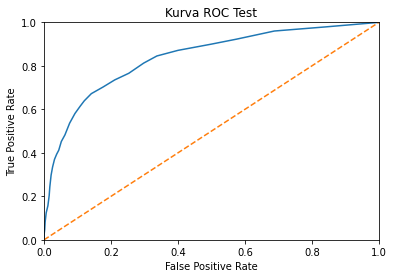

In [58]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)# < ketik kode program Anda di sini >

plt.figure()

#plt.plot([0, 1], [0, 1], linestyle='--')

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC Test')
plt.show() 

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Untuk mengetahui seberapa besar perbedaan model kita dengan model acak, dilakukan perhitungan nilai AUC-ROC (Area Under Curve ROC) Ini adalah metrik evaluasi dengan nilai dalam rentang dari 0 hingga 1. 
Nilai AUC-ROC untuk model acak adalah 0,5. Tidak seperti metrik lainnya, dibutuhkan probabilitas kelas "1", bukan prediksi. Nilai AUC ROC dengan model dan metode diatas untuk valid dan test dataset, nilainya tinggi yaitu 0.82 dan 083.
Bisa dilihat dikurva juga ROV Curve lebih tinggi dari garis diagonal.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Analisis ROC-AUC sudah bagus.
</div>

# Kesimpulan <a id='Kesimpulan'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
* Langkah awal pada projek ini adalah EDA dan pembacaan data yang diambil dari file '/datasets/Churn.csv', diketahui file tersebut berjumlah 14 kolom dan 10,000 baris. 
Tidak ada nilai duplikat namun ada nilai null pada kolom  tenur sekitar 9 peresen. Langkah selanjutnya adalah mengisi nilai kosong dan memperbaiki tipe data.
* Untuk beberapa kolom telah di drop karena tidak mempengaruh pemodelan data. Telah dilakukan juga encoding untuk kategori data menggunakan OHE, telah ditentukan juga target yang akan di prediksi yaitu kolom exited. Juga Fitur atau observasi kecuali kolom exited.
* Dilakukan split data yaitu train, valid dan test dengan proporsional 60:20:20. Train untuk data yang akan kita latih, valid untuk data yang sudah terlatih, 
test data set untuk mengecek lagi model kita. Dilakukan juga standarisasi untuk fitur dengan data numerik
* Dengan kelas imbalnce dan model decsisiontree classifier, randomforest classifier, dan logistic regression untuk semua f1_score dibawah 0.59 (nilai minimal untuk projek ini).
* Dengan metode Upsampling dan  model RadomForest Classsifier kita telah memenuhi nilai minal f1_score projek ini yaitu 0.59.
     
*Berikut informasi yang didapat dari pengujian kualitas model pada test dataset :
- f1_score test dataset yang didapat adalah 0.59, tidak jauh beda dengan valid dataset. Namun jauh berbeda dengan train dataset yang 0.9. 
- Dengan metode upsampling untuk kelas 1 terjadi peningkatan menjadi sekitar 0.17.

Nilai AUC ROC dengan model dan metode diatas untuk valid dan test dataset, nilainya tinggi yaitu 0.82 dan 083. Yang artinya model prediksi kita benar sekitar 83%.
Bisa dilihat dikurva juga ROV Curve lebih tinggi dari garis diagonal. Makin tinggi kurva makin besar TPR(True Positive Rate) nya dan makin baik kualitas model yang dimiliki.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Kesimpulan sangat lengkap, bagus sekali!
</div>